In [ ]:
##########################################################
'''
Mohammadreza Abbasi Sardari
'''

In [96]:
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [2]:
##########################################################
#####q-3)
X , Y = make_moons(n_samples = 1000, noise = 0.35, random_state = 1);

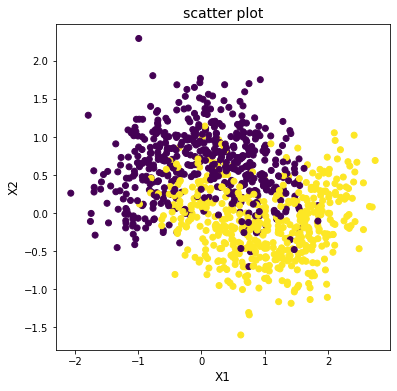

In [70]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.set_title("scatter plot",fontsize = 14)
ax.set_xlabel("X1",fontsize = 12)
ax.set_ylabel("X2",fontsize = 12)
ax.scatter(X[:,0], X[:,1], c = Y, marker = 'o');
plt.show()

In [4]:
num_sample = 150
pairs = list(zip(X,Y))
sub1  = random.sample(pairs, num_sample)
sub2  = random.sample(pairs, num_sample)
sub3  = random.sample(pairs, num_sample)
sub1_list = [list(t) for t in zip(*sub1)]
sub1_x, sub1_y = sub1_list
sub2_list = [list(t) for t in zip(*sub2)]
sub2_x, sub2_y = sub2_list
sub3_list = [list(t) for t in zip(*sub3)]
sub3_x, sub3_y = sub3_list

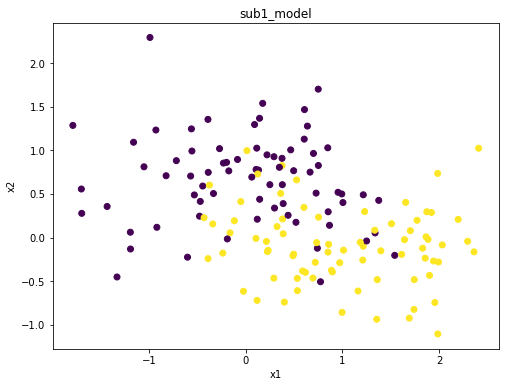

In [5]:
plt.figure(figsize = (8, 6))
scat = plt.scatter(np.asarray(sub1_x)[:,0], np.asarray(sub1_x)[:,1], c = sub1_y, marker = 'o');
plt.title('sub1_model')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [6]:
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(sub1_x, sub1_y)

KNeighborsClassifier(n_neighbors=25)

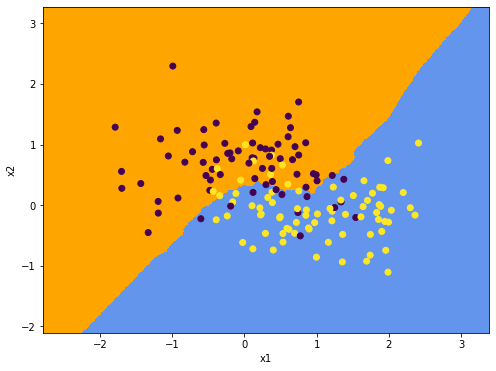

In [7]:
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ['darkorange', 'darkblue']
step = 0.02
x_min, x_max = np.min(np.asarray(sub1_x)[:,0]) - 1, np.max(np.asarray(sub1_x)[:,0]) + 1
y_min, y_max = np.min(np.asarray(sub1_x)[:,1]) - 1, np.max(np.asarray(sub1_x)[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(np.shape(xx))
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(np.asarray(sub1_x)[:,0], np.asarray(sub1_x)[:,1], c=sub1_y, marker = 'o');
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

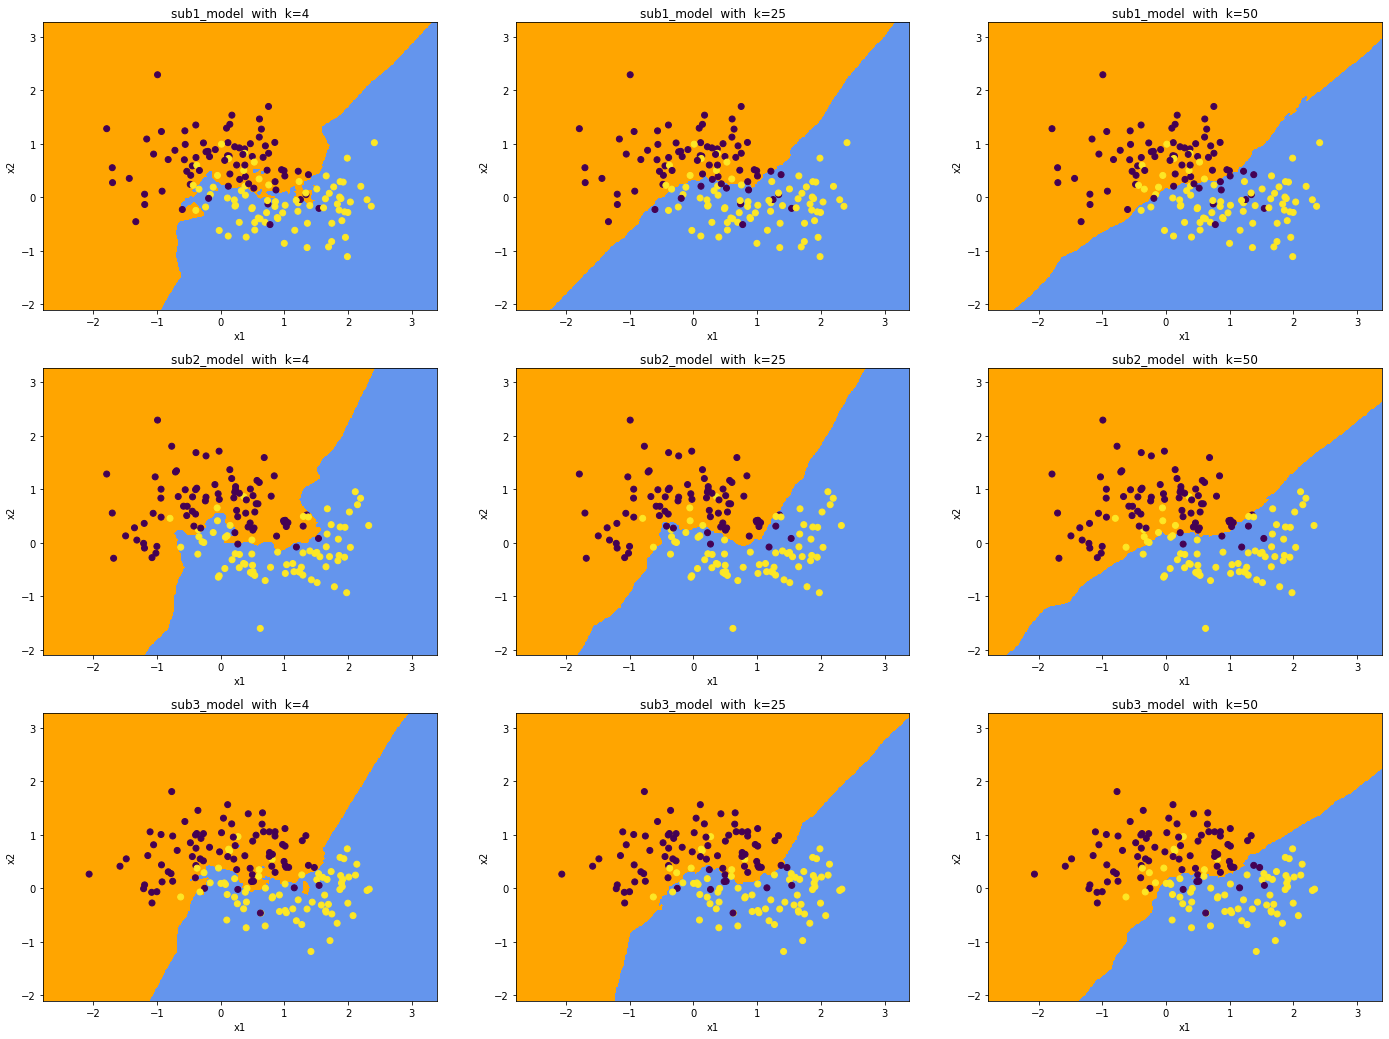

In [94]:
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ['darkorange', 'darkblue']
step = 0.02
x_min, x_max = np.min(np.asarray(sub1_x)[:,0]) - 1, np.max(np.asarray(sub1_x)[:,0]) + 1
y_min, y_max = np.min(np.asarray(sub1_x)[:,1]) - 1, np.max(np.asarray(sub1_x)[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
i = 1
plt.figure(figsize = (24, 18))
for k in [4,25,50]:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(sub1_x, sub1_y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(np.shape(xx))
    plt.subplot(3,3,i)
    i+= 1
    plt.contourf(xx, yy, Z, cmap = cmap_light)
    plt.scatter(np.asarray(sub1_x)[:,0], np.asarray(sub1_x)[:,1], c = sub1_y, marker = 'o');
    plt.title(f'sub1_model  with  k={k}')
    plt.xlabel('x1')
    plt.ylabel('x2')
for k in [4,25,50]:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(sub2_x, sub2_y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(np.shape(xx))
    plt.subplot(3,3,i)
    i+= 1
    plt.contourf(xx, yy, Z, cmap = cmap_light)
    plt.scatter(np.asarray(sub2_x)[:,0], np.asarray(sub2_x)[:,1], c = sub2_y, marker = 'o');
    plt.title(f'sub2_model  with  k={k}')
    plt.xlabel('x1')
    plt.ylabel('x2')
for k in [4,25,50]:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(sub3_x, sub3_y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(np.shape(xx))
    plt.subplot(3,3,i)
    i+= 1
    plt.contourf(xx, yy, Z, cmap = cmap_light)
    plt.scatter(np.asarray(sub3_x)[:,0], np.asarray(sub3_x)[:,1], c = sub3_y, marker = 'o');
    plt.title(f'sub3_model  with  k={k}')
    plt.xlabel('x1')
    plt.ylabel('x2')
plt.savefig('knn', dpi = 400)
plt.show()

In [9]:
##########################################################
#####q-4)
X_test , Y_test = make_moons(n_samples=500, noise=0.35, random_state = 2);
train_score = []
test_score = []
for k in range(500):
    model = KNeighborsClassifier(n_neighbors = k+1)
    model.fit(X, Y)
    train_score.append(model.score(X, Y))
    test_score.append(model.score(X_test, Y_test))

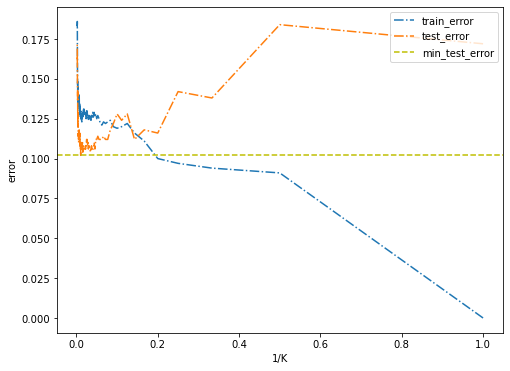

0.898
95


In [10]:
k_fig = np.array(range(1,501))
plt.figure(figsize = (8, 6))
plt.plot(1/(k_fig), 1-np.array(train_score), linestyle = '-.', label = 'train_error')
plt.plot(1/(k_fig), 1-np.array(test_score), linestyle = '-.', label = 'test_error')
max_test_score_index = test_score.index(max(test_score))
plt.axhline(y = 1-max(test_score), color = 'y', linestyle = '--', label = 'min_test_error')
plt.xlabel('1/K')
plt.ylabel('error')
plt.legend(loc = "upper right")
plt.show()
print(max(test_score))
print(max_test_score_index + 1)

0.871
0.898


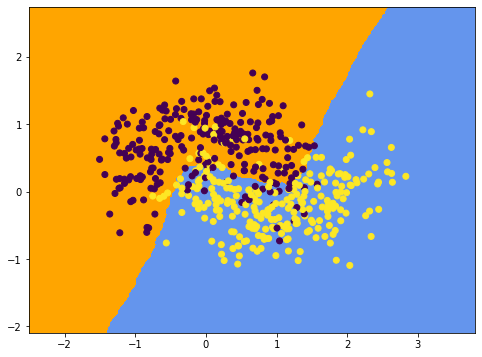

In [11]:
model = KNeighborsClassifier(n_neighbors = max_test_score_index + 1)
model.fit(X, Y)
print(model.score(X, Y))
print(model.score(X_test,Y_test))
################
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ['darkorange', 'darkblue']
step = 0.02
x_min, x_max = np.min(X_test[:,0]) - 1, np.max(X_test[:,0]) + 1
y_min, y_max = np.min(X_test[:,1]) - 1, np.max(X_test[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(np.shape(xx))
plt.figure(figsize = (8, 6))
plt.contourf(xx, yy, Z, cmap = cmap_light)
plt.scatter(X_test[:,0], X_test[:,1], c = Y_test, marker = 'o');
plt.show()

In [77]:
##########################################################
#####q-5)
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25
           ,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60
           ,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]

In [78]:
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,
84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99
,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,
4.90,55.44,50.09,155.66,45.57,18.12,30.58]

In [79]:
x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]

In [80]:
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

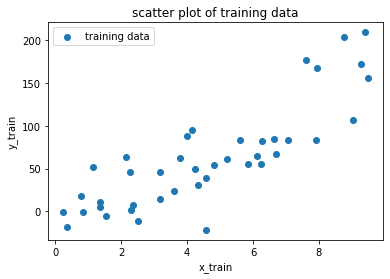

In [81]:
plt.scatter(x_train, y_train, label = 'training data')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('scatter plot of training data')
plt.legend()
plt.show()

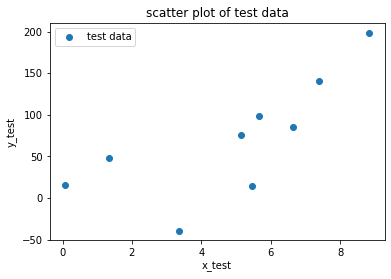

In [82]:
plt.scatter(x_test, y_test, label = 'test data')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('scatter plot of test data')
plt.legend()
plt.show()

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(np.array(x_train).reshape((-1, 1)), y_train)
model_score = model.score(np.array(x_train).reshape((-1, 1)), y_train)
print('score:', model_score)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

score: 0.7014590913812251
intercept: -21.73078292905422
slope: [18.30320685]


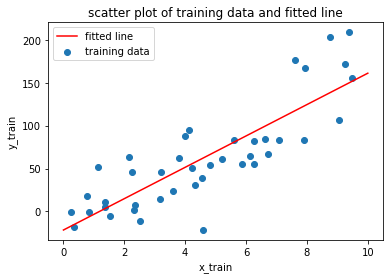

In [40]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(np.array(xfit).reshape((-1, 1)))
plt.scatter(x_train, y_train, label='training data')
plt.plot(xfit, yfit, label = 'fitted line', color = 'r');
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('scatter plot of training data and fitted line')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE = mean_squared_error(y_train, model.predict(np.array(x_train).reshape((-1, 1))))
R2 = r2_score(y_train, model.predict(np.array(x_train).reshape((-1, 1))))
print(MSE)
print(R2)

1052.5853662498014
0.7014590913812251


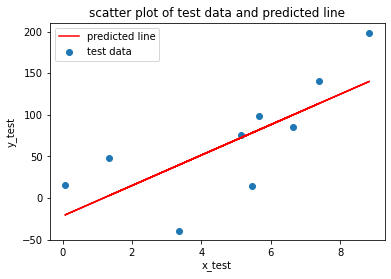

In [44]:
y_pred_test = model.predict(np.array(x_test).reshape((-1, 1)))

# Plot the estimated linear regression line with matplotlib:
plt.scatter(x_test, y_test, label = 'test data')
plt.plot(x_test, y_pred_test, label = 'predicted line', color = 'r');
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('scatter plot of test data and predicted line')
plt.legend()
plt.show()

In [45]:
MSE_test = mean_squared_error(y_test, y_pred_test)
R2_test = r2_score(y_test, y_pred_test)
print(MSE_test)
print(R2_test)

2023.3121088887128
0.5556465885794163


In [722]:
#######################################

In [87]:
x_train_feature1 = x_train
x_train_feature2 = np.array(x_train)**2
x_train_new = [x_train_feature1, x_train_feature2]
model = LinearRegression().fit(np.array(x_train_new).T, y_train)
model_score = model.score(np.array(x_train_new).T, y_train)
print('score:', model_score)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

score: 0.7490480719353505
intercept: 8.007337461589657
slope: [0.47100686 1.83208191]


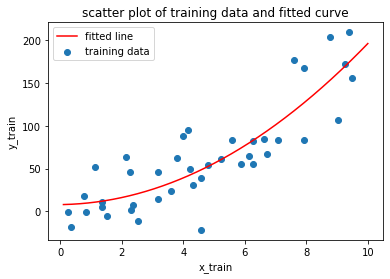

In [88]:
xfit_feature1 = np.linspace(0.1, 10, 1000)
xfit_feature2 = xfit_feature1**2
xfit_new = [xfit_feature1, xfit_feature2]
yfit_new = model.predict(np.array(xfit_new).T)

# Plot the estimated linear regression line with matplotlib:
plt.scatter(x_train, y_train, label = 'training data')
plt.plot(xfit_feature1, yfit_new, label = 'fitted line', color = 'r')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('scatter plot of training data and fitted curve')
plt.legend()
plt.show()

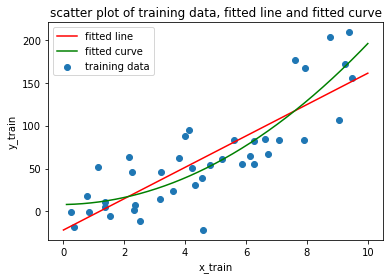

In [50]:
plt.scatter(x_train, y_train, label = 'training data')
plt.plot(xfit, yfit, label = 'fitted line', color = 'r');
plt.plot(xfit_feature1, yfit_new, label = 'fitted curve', color = 'g')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('scatter plot of training data, fitted line and fitted curve')
plt.legend()
plt.show()

In [51]:
MSE_new = mean_squared_error(y_train, model.predict(np.array(x_train_new).T))
R2_new = r2_score(y_train, model.predict(np.array(x_train_new).T))
print(MSE_new)
print(R2_new)

884.797759660905
0.7490480719353505


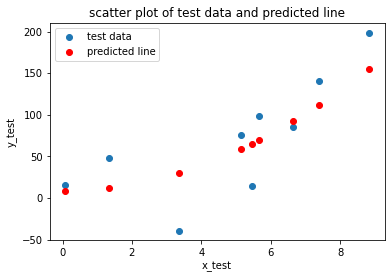

In [89]:
x_test_feature1 = x_test
x_test_feature2 = np.array(x_test_feature1)**2
# x_test_feature3 = np.array(x_test_feature1)**3
# x_test_feature4 = np.array(x_test_feature1)**4
# x_test_feature5 = np.array(x_test_feature1)**5
# x_test_feature6 = np.array(x_test_feature1)**6
# x_test_feature7 = np.array(x_test_feature1)**7
# x_test_feature6 = 1/np.array(x_test_feature1)
# x_test_feature7 = np.log(np.array(x_test_feature1))
x_test_new = [x_test_feature1, x_test_feature2]
y_pred_test_new = model.predict(np.array(x_test_new).T)
# Plot the estimated linear regression line with matplotlib:
plt.scatter(x_test, y_test, label = 'test data')
plt.scatter(x_test, y_pred_test_new, label = 'predicted line', color = 'r');
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('scatter plot of test data and predicted line')
plt.legend()
plt.show()

In [56]:
MSE_test_new = mean_squared_error(y_test, y_pred_test_new)
R2_test_new = r2_score(y_test, y_pred_test_new)
print(MSE_test_new)
print(R2_test_new)

1398.881758014395
0.6927820089560344


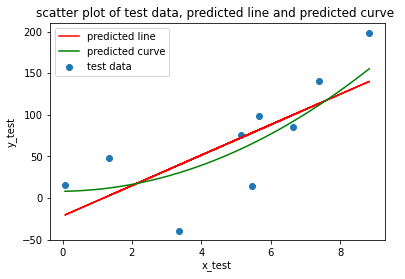

In [60]:
xfit_test_feature1 = np.linspace(np.array(x_test).min(), np.array(x_test).max(), 1000)
xfit_test_feature2 = xfit_test_feature1**2
xfit_test_new = [xfit_test_feature1, xfit_test_feature2]
yfit_test_new = model.predict(np.array(xfit_test_new).T)

plt.scatter(x_test, y_test, label = 'test data')
plt.plot(x_test, y_pred_test, label = 'predicted line', color = 'r')
plt.plot(xfit_test_feature1, yfit_test_new, label = 'predicted curve', color = 'g')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('scatter plot of test data, predicted line and predicted curve ')
plt.legend()
plt.show()